In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# EvM Tower Scatter Plot

In [57]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/EvM_corrected_temperature_data.csv"

# Read CSV file
df = pd.read_csv(file_path)

# Display the first few rows to inspect the 'Components' column
print(df.head())

# Split 'Components' column into 'Year' and 'Month' columns
df[['Year', 'Month']] = df['Components'].str.extract(r'Year: (\d+), Month: (\d+)')

# Convert 'Year' and 'Month' columns to integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

   TIMESTAMP_START  TIMESTAMP_END      FC      TA      Lat     Long  \
0     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
1     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
2     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
3     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
4     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   

              Components  
0  Year: 2020, Month: 01  
1  Year: 2020, Month: 01  
2  Year: 2020, Month: 01  
3  Year: 2020, Month: 01  
4  Year: 2020, Month: 01  


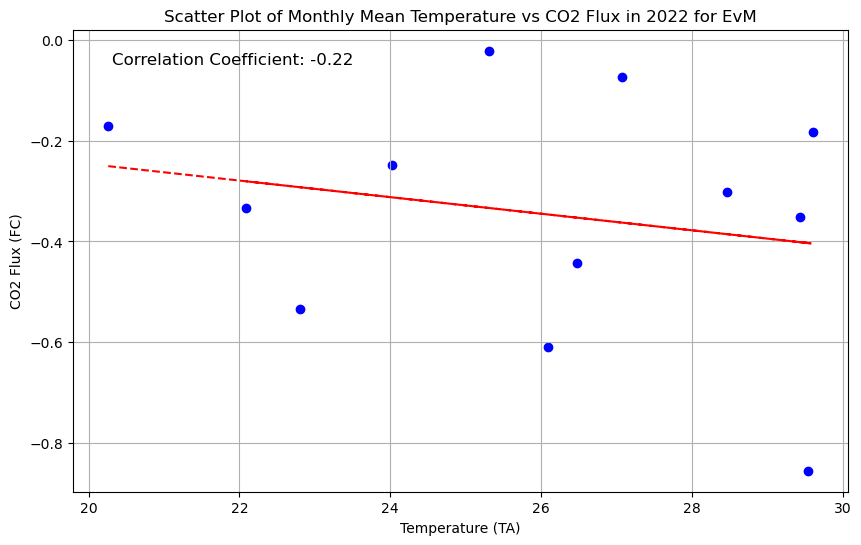

In [58]:
# Replace -9999 with NaN in temperature and FC columns
temperature_columns = ['TA']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)
df['FC'] = df['FC'].replace(-9999, np.nan)

# Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Convert temperature columns and FC to numeric (if necessary)
df[temperature_columns + ['FC']] = df[temperature_columns + ['FC']].apply(pd.to_numeric, errors='coerce')

# Filter data for the year 2022
df_2022 = df[df['Year'] == 2022]

# Calculate monthly mean temperatures and FC for 2022
monthly_means_2022 = df_2022.groupby(['Year', 'Month'])[temperature_columns + ['FC']].mean().reset_index()

# Convert 'Year' and 'Month' back to datetime for plotting
monthly_means_2022['Date'] = pd.to_datetime(monthly_means_2022[['Year', 'Month']].assign(day=1))

# Create scatter plot for temperature vs CO2 flux in 2022
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(monthly_means_2022['TA'], monthly_means_2022['FC'], label='Data Points', color='b')

# Add trendline
z = np.polyfit(monthly_means_2022['TA'], monthly_means_2022['FC'], 1)
p = np.poly1d(z)
plt.plot(monthly_means_2022['TA'], p(monthly_means_2022['TA']), linestyle='--', color='r', label='Trendline')

# Calculate correlation coefficient
correlation_coefficient = monthly_means_2022['TA'].corr(monthly_means_2022['FC'])

# Display correlation coefficient
plt.text(0.05, 0.95, f'Correlation Coefficient: {correlation_coefficient:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.xlabel('Temperature (TA)')
plt.ylabel('CO2 Flux (FC)')
plt.title('Scatter Plot of Monthly Mean Temperature vs CO2 Flux in 2022 for EvM')
plt.grid(True)
plt.show()

# Elm Tower Scatter Plot

In [59]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/Elm_corrected_temperature_data.csv"

# Read CSV file
df = pd.read_csv(file_path)

# Display the first few rows to inspect the 'Components' column
print(df.head())

# Split 'Components' column into 'Year' and 'Month' columns
df[['Year', 'Month']] = df['Components'].str.extract(r'Year: (\d+), Month: (\d+)')

# Convert 'Year' and 'Month' columns to integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Display the updated DataFrame
print(df.head())

   TIMESTAMP_START  TIMESTAMP_END      FC   TA_F      Lat     Long  \
0     201601010000   201601010030 -9999.0  23.70  25.5519 -80.7826   
1     201601010030   201601010100 -9999.0  23.64  25.5519 -80.7826   
2     201601010100   201601010130 -9999.0  23.52  25.5519 -80.7826   
3     201601010130   201601010200 -9999.0  23.44  25.5519 -80.7826   
4     201601010200   201601010230 -9999.0  23.38  25.5519 -80.7826   

              Components  
0  Year: 2016, Month: 01  
1  Year: 2016, Month: 01  
2  Year: 2016, Month: 01  
3  Year: 2016, Month: 01  
4  Year: 2016, Month: 01  
   TIMESTAMP_START  TIMESTAMP_END      FC   TA_F      Lat     Long  \
0     201601010000   201601010030 -9999.0  23.70  25.5519 -80.7826   
1     201601010030   201601010100 -9999.0  23.64  25.5519 -80.7826   
2     201601010100   201601010130 -9999.0  23.52  25.5519 -80.7826   
3     201601010130   201601010200 -9999.0  23.44  25.5519 -80.7826   
4     201601010200   201601010230 -9999.0  23.38  25.5519 -80.7826 

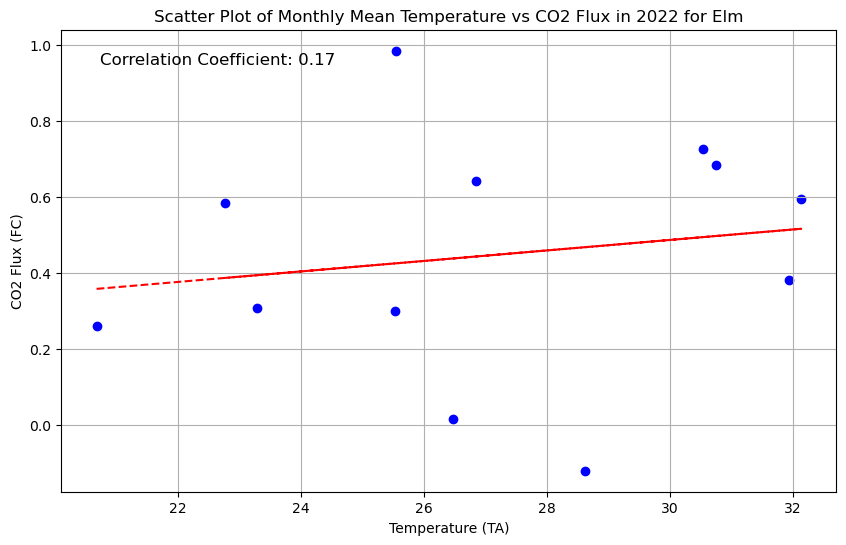

In [60]:
# Replace -9999 with NaN in temperature and FC columns
temperature_columns = ['TA_F']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)
df['FC'] = df['FC'].replace(-9999, np.nan)

# Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Convert temperature columns and FC to numeric (if necessary)
df[temperature_columns + ['FC']] = df[temperature_columns + ['FC']].apply(pd.to_numeric, errors='coerce')

# Filter data for the year 2022
df_2022 = df[df['Year'] == 2022]

# Calculate monthly mean temperatures and FC for 2022
monthly_means_2022 = df_2022.groupby(['Year', 'Month'])[temperature_columns + ['FC']].mean().reset_index()

# Convert 'Year' and 'Month' back to datetime for plotting
monthly_means_2022['Date'] = pd.to_datetime(monthly_means_2022[['Year', 'Month']].assign(day=1))

# Create scatter plot for temperature vs CO2 flux in 2022
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(monthly_means_2022['TA_F'], monthly_means_2022['FC'], label='Data Points', color='b')

# Add trendline
z = np.polyfit(monthly_means_2022['TA_F'], monthly_means_2022['FC'], 1)
p = np.poly1d(z)
plt.plot(monthly_means_2022['TA_F'], p(monthly_means_2022['TA_F']), linestyle='--', color='r', label='Trendline')

# Calculate correlation coefficient
correlation_coefficient = monthly_means_2022['TA_F'].corr(monthly_means_2022['FC'])

# Display correlation coefficient
plt.text(0.05, 0.95, f'Correlation Coefficient: {correlation_coefficient:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.xlabel('Temperature (TA)')
plt.ylabel('CO2 Flux (FC)')
plt.title('Scatter Plot of Monthly Mean Temperature vs CO2 Flux in 2022 for Elm')
plt.grid(True)
plt.show()

# Esm Tower Scatter Plot

In [61]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/Esm_corrected_temperature_data.csv"

# Read CSV file
df = pd.read_csv(file_path)

# Display the first few rows to inspect the 'Components' column
print(df.head())

# Split 'Components' column into 'Year' and 'Month' columns
df[['Year', 'Month']] = df['Components'].str.extract(r'Year: (\d+), Month: (\d+)')

# Convert 'Year' and 'Month' columns to integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Display the updated DataFrame
print(df.head())

   TIMESTAMP_START  TIMESTAMP_END      FC    TA_F      Lat     Long  \
0     201601010000   201601010030 -9999.0 -9999.0  25.4379 -80.5946   
1     201601010030   201601010100 -9999.0 -9999.0  25.4379 -80.5946   
2     201601010100   201601010130 -9999.0 -9999.0  25.4379 -80.5946   
3     201601010130   201601010200 -9999.0 -9999.0  25.4379 -80.5946   
4     201601010200   201601010230 -9999.0 -9999.0  25.4379 -80.5946   

              Components  
0  Year: 2016, Month: 01  
1  Year: 2016, Month: 01  
2  Year: 2016, Month: 01  
3  Year: 2016, Month: 01  
4  Year: 2016, Month: 01  
   TIMESTAMP_START  TIMESTAMP_END      FC    TA_F      Lat     Long  \
0     201601010000   201601010030 -9999.0 -9999.0  25.4379 -80.5946   
1     201601010030   201601010100 -9999.0 -9999.0  25.4379 -80.5946   
2     201601010100   201601010130 -9999.0 -9999.0  25.4379 -80.5946   
3     201601010130   201601010200 -9999.0 -9999.0  25.4379 -80.5946   
4     201601010200   201601010230 -9999.0 -9999.0  25.43

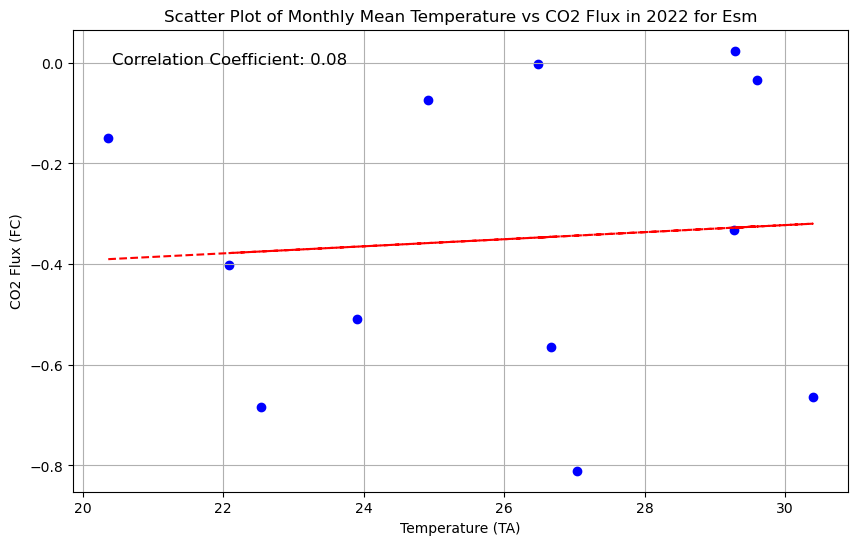

In [62]:
# Replace -9999 with NaN in temperature and FC columns
temperature_columns = ['TA_F']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)
df['FC'] = df['FC'].replace(-9999, np.nan)

# Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Convert temperature columns and FC to numeric (if necessary)
df[temperature_columns + ['FC']] = df[temperature_columns + ['FC']].apply(pd.to_numeric, errors='coerce')

# Filter data for the year 2022
df_2022 = df[df['Year'] == 2022]

# Calculate monthly mean temperatures and FC for 2022
monthly_means_2022 = df_2022.groupby(['Year', 'Month'])[temperature_columns + ['FC']].mean().reset_index()

# Convert 'Year' and 'Month' back to datetime for plotting
monthly_means_2022['Date'] = pd.to_datetime(monthly_means_2022[['Year', 'Month']].assign(day=1))

# Create scatter plot for temperature vs CO2 flux in 2022
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(monthly_means_2022['TA_F'], monthly_means_2022['FC'], label='Data Points', color='b')

# Add trendline
z = np.polyfit(monthly_means_2022['TA_F'], monthly_means_2022['FC'], 1)
p = np.poly1d(z)
plt.plot(monthly_means_2022['TA_F'], p(monthly_means_2022['TA_F']), linestyle='--', color='r', label='Trendline')

# Calculate correlation coefficient
correlation_coefficient = monthly_means_2022['TA_F'].corr(monthly_means_2022['FC'])

# Display correlation coefficient
plt.text(0.05, 0.95, f'Correlation Coefficient: {correlation_coefficient:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.xlabel('Temperature (TA)')
plt.ylabel('CO2 Flux (FC)')
plt.title('Scatter Plot of Monthly Mean Temperature vs CO2 Flux in 2022 for Esm')
plt.grid(True)
plt.show()

# TaS Tower Scatter Plot

In [63]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/TaS_corrected_temperature_data.csv"

# Read CSV file
df = pd.read_csv(file_path)

# Display the first few rows to inspect the 'Components' column
print(df.head())

# Split 'Components' column into 'Year' and 'Month' columns
df[['Year', 'Month']] = df['Components'].str.extract(r'Year: (\d+), Month: (\d+)')

# Convert 'Year' and 'Month' columns to integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Display the updated DataFrame
print(df.head())

   TIMESTAMP_START  TIMESTAMP_END      FC      TA      Lat     Long  \
0     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
1     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
2     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
3     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
4     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   

              Components  
0  Year: 2016, Month: 01  
1  Year: 2016, Month: 01  
2  Year: 2016, Month: 01  
3  Year: 2016, Month: 01  
4  Year: 2016, Month: 01  
   TIMESTAMP_START  TIMESTAMP_END      FC      TA      Lat     Long  \
0     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
1     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
2     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
3     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
4     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.19

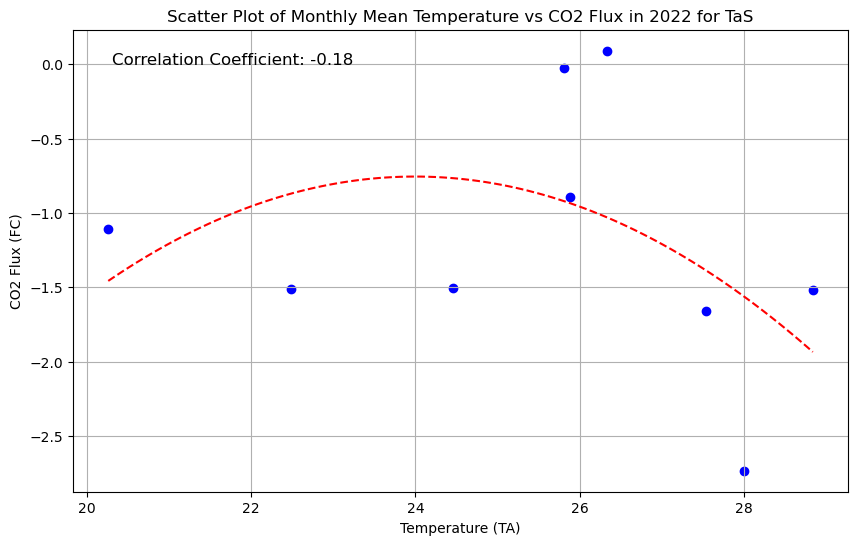

In [64]:
# Replace -9999 with NaN in temperature and FC columns
temperature_columns = ['TA']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)
df['FC'] = df['FC'].replace(-9999, np.nan)

# Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Prepare data for analysis
# Convert temperature columns and FC to numeric (if necessary)
df[temperature_columns + ['FC']] = df[temperature_columns + ['FC']].apply(pd.to_numeric, errors='coerce')

# Filter data for the year 2022
df_2022 = df[df['Year'] == 2022]

# Calculate monthly mean temperatures and FC for 2022
monthly_means_2022 = df_2022.groupby(['Year', 'Month'])[temperature_columns + ['FC']].mean().reset_index()

# Convert 'Year' and 'Month' back to datetime for plotting
monthly_means_2022['Date'] = pd.to_datetime(monthly_means_2022[['Year', 'Month']].assign(day=1))

# Drop any rows with NaN values in TA or FC columns
monthly_means_2022 = monthly_means_2022.dropna(subset=temperature_columns + ['FC'])

# Ensure there are enough data points for polynomial regression
if len(monthly_means_2022) > 1:
    # Create scatter plot for temperature vs CO2 flux in 2022
    plt.figure(figsize=(10, 6))

    # Scatter plot
    plt.scatter(monthly_means_2022['TA'], monthly_means_2022['FC'], label='Data Points', color='b')

    # Add trendline (quadratic)
    z = np.polyfit(monthly_means_2022['TA'], monthly_means_2022['FC'], 2)
    p = np.poly1d(z)
    xp = np.linspace(monthly_means_2022['TA'].min(), monthly_means_2022['TA'].max(), 100)
    plt.plot(xp, p(xp), linestyle='--', color='r', label='Trendline (quadratic)')

    # Calculate correlation coefficient
    correlation_coefficient = monthly_means_2022['TA'].corr(monthly_means_2022['FC'])

    # Display correlation coefficient
    plt.text(0.05, 0.95, f'Correlation Coefficient: {correlation_coefficient:.2f}', 
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    plt.xlabel('Temperature (TA)')
    plt.ylabel('CO2 Flux (FC)')
    plt.title('Scatter Plot of Monthly Mean Temperature vs CO2 Flux in 2022 for TaS')
    plt.grid(True)
    plt.show()
else:
    print("Not enough data points to perform polynomial regression.")


# xDS Tower Scatter Plot

In [65]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/xDS_corrected_temperature_data.csv"

# Read CSV file
df = pd.read_csv(file_path)

# Display the first few rows to inspect the 'Components' column
print(df.head())

# Split 'Components' column into 'Year' and 'Month' columns
df[['Year', 'Month']] = df['Components'].str.extract(r'Year: (\d+), Month: (\d+)')

# Convert 'Year' and 'Month' columns to integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Display the updated DataFrame
print(df.head())

   TIMESTAMP_START  TIMESTAMP_END      FC      TA     Lat     Long  \
0     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
1     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
2     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
3     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
4     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   

              Components  
0  Year: 2017, Month: 01  
1  Year: 2017, Month: 01  
2  Year: 2017, Month: 01  
3  Year: 2017, Month: 01  
4  Year: 2017, Month: 01  
   TIMESTAMP_START  TIMESTAMP_END      FC      TA     Lat     Long  \
0     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
1     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
2     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
3     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
4     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362 

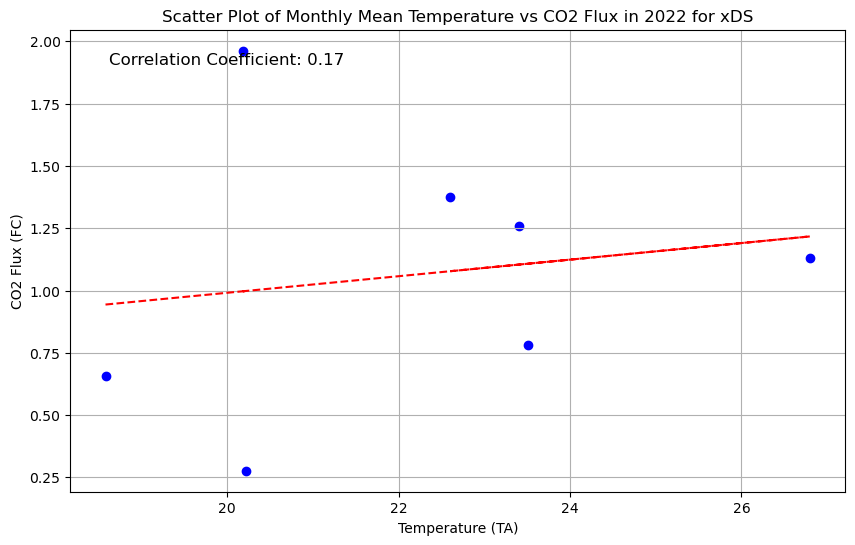

In [67]:
# Replace -9999 with NaN in temperature and FC columns
temperature_columns = ['TA']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)
df['FC'] = df['FC'].replace(-9999, np.nan)

# Filter 'FC' for outliers
df = df[(df['FC'] <= 4) & (df['FC'] >= -4)]

# Filter out negative values from temperature columns
for col in temperature_columns:
    df = df[df[col] >= 0]
    
# Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Convert temperature columns and FC to numeric (if necessary)
df[temperature_columns + ['FC']] = df[temperature_columns + ['FC']].apply(pd.to_numeric, errors='coerce')

# Filter data for the year 2022
df_2022 = df[df['Year'] == 2022]

# Calculate monthly mean temperatures and FC for 2022
monthly_means_2022 = df_2022.groupby(['Year', 'Month'])[temperature_columns + ['FC']].mean().reset_index()

# Convert 'Year' and 'Month' back to datetime for plotting
monthly_means_2022['Date'] = pd.to_datetime(monthly_means_2022[['Year', 'Month']].assign(day=1))

# Create scatter plot for temperature vs CO2 flux in 2022
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(monthly_means_2022['TA'], monthly_means_2022['FC'], label='Data Points', color='b')

# Add trendline
z = np.polyfit(monthly_means_2022['TA'], monthly_means_2022['FC'], 1)
p = np.poly1d(z)
plt.plot(monthly_means_2022['TA'], p(monthly_means_2022['TA']), linestyle='--', color='r', label='Trendline')

# Calculate correlation coefficient
correlation_coefficient = monthly_means_2022['TA'].corr(monthly_means_2022['FC'])

# Display correlation coefficient
plt.text(0.05, 0.95, f'Correlation Coefficient: {correlation_coefficient:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.xlabel('Temperature (TA)')
plt.ylabel('CO2 Flux (FC)')
plt.title('Scatter Plot of Monthly Mean Temperature vs CO2 Flux in 2022 for xDS')
plt.grid(True)
plt.show()